In [96]:
import requests
import pandas as pd

api_url = "https://data.cityofnewyork.us/resource/h9gi-nx95.json?$query=SELECT%0A%20%20%60crash_date%60%2C%0A%20%20%60crash_time%60%2C%0A%20%20%60borough%60%2C%0A%20%20%60zip_code%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60location%60%2C%0A%20%20%60on_street_name%60%2C%0A%20%20%60off_street_name%60%2C%0A%20%20%60cross_street_name%60%2C%0A%20%20%60number_of_persons_injured%60%2C%0A%20%20%60number_of_persons_killed%60%2C%0A%20%20%60number_of_pedestrians_injured%60%2C%0A%20%20%60number_of_pedestrians_killed%60%2C%0A%20%20%60number_of_cyclist_injured%60%2C%0A%20%20%60number_of_cyclist_killed%60%2C%0A%20%20%60number_of_motorist_injured%60%2C%0A%20%20%60number_of_motorist_killed%60%2C%0A%20%20%60contributing_factor_vehicle_1%60%2C%0A%20%20%60contributing_factor_vehicle_2%60%2C%0A%20%20%60contributing_factor_vehicle_3%60%2C%0A%20%20%60contributing_factor_vehicle_4%60%2C%0A%20%20%60contributing_factor_vehicle_5%60%2C%0A%20%20%60collision_id%60%2C%0A%20%20%60vehicle_type_code1%60%2C%0A%20%20%60vehicle_type_code2%60%2C%0A%20%20%60vehicle_type_code_3%60%2C%0A%20%20%60vehicle_type_code_4%60%2C%0A%20%20%60vehicle_type_code_5%60"
response = requests.get(api_url)

if response.status_code == 200:
    print("Request successful")
    data = response.json()

    # Read JSON data into a Pandas DataFrame
    df = pd.DataFrame(data)

    # Display the DataFrame
    print(df.head())  # Adjust the number of rows displayed as needed
else:
    print(f"Request failed with status code: {response.status_code}")


Request successful
                crash_date crash_time           on_street_name  \
0  2021-09-11T00:00:00.000       2:39    WHITESTONE EXPRESSWAY   
1  2022-03-26T00:00:00.000      11:45  QUEENSBORO BRIDGE UPPER   
2  2022-06-29T00:00:00.000       6:55       THROGS NECK BRIDGE   
3  2021-09-11T00:00:00.000       9:35                      NaN   
4  2021-12-14T00:00:00.000       8:13          SARATOGA AVENUE   

  off_street_name number_of_persons_injured number_of_persons_killed  \
0       20 AVENUE                         2                        0   
1             NaN                         1                        0   
2             NaN                         0                        0   
3             NaN                         0                        0   
4  DECATUR STREET                         0                        0   

  number_of_pedestrians_injured number_of_pedestrians_killed  \
0                             0                            0   
1                      

In [97]:
#Dropping columns we will not use
columns_dropped_df=df.drop(['on_street_name','off_street_name','cross_street_name',
       'location', 'cross_street_name','contributing_factor_vehicle_4','vehicle_type_code_4',
       'contributing_factor_vehicle_5', 'vehicle_type_code_5', 'zip_code']
       , axis=1)
columns_dropped_df
    

,crash_date,crash_time,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,borough,latitude,longitude,contributing_factor_vehicle_3,vehicle_type_code_3
0,2021-09-11T00:00:00.000,2:39,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,NaN,NaN,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,1,0,0,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-29T00:00:00.000,6:55,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,NaN,NaN
3,2021-09-11T00:00:00.000,9:35,0,0,0,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,BROOKLYN,40.667202,-73.8665,NaN,NaN
4,2021-12-14T00:00:00.000,8:13,0,0,0,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN,BROOKLYN,40.683304,-73.917274,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-04-14T00:00:00.000,12:47,2,0,0,0,0,0,2,0,Turning Improperly,NaN,4407740,Station Wagon/Sport Utility Vehicle,NaN,BROOKLYN,40.676594,-73.89038,NaN,NaN
996,2021-04-16T00:00:00.000,14:30,0,0,0,0,0,0,0,0,Backing Unsafely,NaN,4408392,Sedan,NaN,NaN,40.76468,-73.9643,NaN,NaN
997,2021-04-15T00:00:00.000,0:00,3,0,0,0,0,0,3,0,Driver Inattention/Distraction,Unspecified,4407822,Sedan,NaN,MANHATTAN,40.832764,-73.94583,NaN,NaN
998,2021-04-14T00:00:00.000,6:55,0,0,0,0,0,0,0,0,Following Too Closely,NaN,4407655,Station Wagon/Sport Utility Vehicle,NaN,NaN,40.698544,-73.96236,NaN,NaN


In [98]:
#Data after dropping the Nan in "bourough,latitude and longitude"
clean_data = columns_dropped_df.dropna(subset=['borough'] + ['latitude']+ ['longitude'])
clean_data

,crash_date,crash_time,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,borough,latitude,longitude,contributing_factor_vehicle_3,vehicle_type_code_3
3,2021-09-11T00:00:00.000,9:35,0,0,0,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,BROOKLYN,40.667202,-73.8665,NaN,NaN
4,2021-12-14T00:00:00.000,8:13,0,0,0,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN,BROOKLYN,40.683304,-73.917274,NaN,NaN
7,2021-12-14T00:00:00.000,8:17,2,0,0,0,0,0,2,0,Unspecified,Unspecified,4486660,Sedan,Sedan,BRONX,40.86816,-73.83148,NaN,NaN
8,2021-12-14T00:00:00.000,21:10,0,0,0,0,0,0,0,0,Driver Inexperience,Unspecified,4487074,Sedan,NaN,BROOKLYN,40.67172,-73.8971,NaN,NaN
9,2021-12-14T00:00:00.000,14:58,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,4486519,Sedan,Station Wagon/Sport Utility Vehicle,MANHATTAN,40.75144,-73.97397,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,2021-04-15T00:00:00.000,23:06,1,0,0,0,0,0,1,0,Traffic Control Disregarded,Unspecified,4407680,Sedan,Sedan,BRONX,40.863647,-73.8918,NaN,NaN
992,2021-04-10T00:00:00.000,4:45,0,0,0,0,0,0,0,0,Traffic Control Disregarded,Unspecified,4408304,Sedan,NaN,BROOKLYN,40.689426,-73.94223,NaN,NaN
995,2021-04-14T00:00:00.000,12:47,2,0,0,0,0,0,2,0,Turning Improperly,NaN,4407740,Station Wagon/Sport Utility Vehicle,NaN,BROOKLYN,40.676594,-73.89038,NaN,NaN
997,2021-04-15T00:00:00.000,0:00,3,0,0,0,0,0,3,0,Driver Inattention/Distraction,Unspecified,4407822,Sedan,NaN,MANHATTAN,40.832764,-73.94583,NaN,NaN


In [99]:
#Rename the columns
vehicle_data=clean_data.rename(columns={
    "vehicle_type_code1": "vehicle_1",
    "vehicle_type_code2": "vehicle_2",
    "vehicle_type_code_3": "vehicle_3",
    "contributing_factor_vehicle_1": "contributing_vehicle_1",
    "contributing_factor_vehicle_2": "contributing_vehicle_2",
    "contributing_factor_vehicle_3": "contributing_vehicle_3",
    "number_of_persons_injured": "persons_injured",
    "number_of_persons_killed": "persons_killed",
    "number_of_pedestrians_injured": "pedestrians_injured",
    "number_of_pedestrians_killed": "pedestrians_killed",
    "number_of_cyclist_injured": "cyclist_injured",
    "number_of_cyclist_killed": "cyclist_killed",
    "number_of_motorist_injured": "motorist_injured",
    "number_of_motorist_killed": "motorist_killed"
})
vehicle_data

,crash_date,crash_time,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_vehicle_1,contributing_vehicle_2,collision_id,vehicle_1,vehicle_2,borough,latitude,longitude,contributing_vehicle_3,vehicle_3
3,2021-09-11T00:00:00.000,9:35,0,0,0,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,BROOKLYN,40.667202,-73.8665,NaN,NaN
4,2021-12-14T00:00:00.000,8:13,0,0,0,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN,BROOKLYN,40.683304,-73.917274,NaN,NaN
7,2021-12-14T00:00:00.000,8:17,2,0,0,0,0,0,2,0,Unspecified,Unspecified,4486660,Sedan,Sedan,BRONX,40.86816,-73.83148,NaN,NaN
8,2021-12-14T00:00:00.000,21:10,0,0,0,0,0,0,0,0,Driver Inexperience,Unspecified,4487074,Sedan,NaN,BROOKLYN,40.67172,-73.8971,NaN,NaN
9,2021-12-14T00:00:00.000,14:58,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,4486519,Sedan,Station Wagon/Sport Utility Vehicle,MANHATTAN,40.75144,-73.97397,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,2021-04-15T00:00:00.000,23:06,1,0,0,0,0,0,1,0,Traffic Control Disregarded,Unspecified,4407680,Sedan,Sedan,BRONX,40.863647,-73.8918,NaN,NaN
992,2021-04-10T00:00:00.000,4:45,0,0,0,0,0,0,0,0,Traffic Control Disregarded,Unspecified,4408304,Sedan,NaN,BROOKLYN,40.689426,-73.94223,NaN,NaN
995,2021-04-14T00:00:00.000,12:47,2,0,0,0,0,0,2,0,Turning Improperly,NaN,4407740,Station Wagon/Sport Utility Vehicle,NaN,BROOKLYN,40.676594,-73.89038,NaN,NaN
997,2021-04-15T00:00:00.000,0:00,3,0,0,0,0,0,3,0,Driver Inattention/Distraction,Unspecified,4407822,Sedan,NaN,MANHATTAN,40.832764,-73.94583,NaN,NaN


In [100]:
# Convert 'crash_date' and 'crash_time' columns to datetime format
vehicle_data['crash_date'] = pd.to_datetime(vehicle_data['crash_date'], errors='coerce')
vehicle_data['crash_time'] = pd.to_datetime(vehicle_data['crash_time'], errors='coerce')

# Extract the time part and update the 'crash_time' column
vehicle_data['crash_time'] = vehicle_data['crash_time'].dt.time

C:\Users\krish\AppData\Local\Temp\ipykernel_7736\2129189259.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vehicle_data['crash_time'] = pd.to_datetime(vehicle_data['crash_time'], errors='coerce')


In [101]:
# Assuming your DataFrame is named vehicle_data

# Convert selected columns to integer
int_columns = ['persons_injured', 'persons_killed', 'pedestrians_injured', 'pedestrians_killed',
               'cyclist_injured', 'cyclist_killed', 'motorist_injured', 'motorist_killed']

vehicle_data[int_columns] = vehicle_data[int_columns].astype(int, errors='ignore')

# Convert latitude and longitude to float
float_columns = ['latitude', 'longitude']
vehicle_data[float_columns] = vehicle_data[float_columns].astype(float, errors='ignore')

# Convert remaining columns to string
str_columns = [col for col in vehicle_data.columns if col not in int_columns + float_columns]
vehicle_data[str_columns] = vehicle_data[str_columns].astype(str)

# Verify the changes
print(vehicle_data.dtypes)

crash_date                 object
crash_time                 object
persons_injured             int32
persons_killed              int32
pedestrians_injured         int32
pedestrians_killed          int32
cyclist_injured             int32
cyclist_killed              int32
motorist_injured            int32
motorist_killed             int32
contributing_vehicle_1     object
contributing_vehicle_2     object
collision_id               object
vehicle_1                  object
vehicle_2                  object
borough                    object
latitude                  float64
longitude                 float64
contributing_vehicle_3     object
vehicle_3                  object
dtype: object


In [102]:
# placing columns in order
desired_column_order = [
    'collision_id', 'crash_date', 'crash_time', 
    'borough', 'latitude', 'longitude',
    'persons_injured', 'persons_killed',
    'pedestrians_injured', 'pedestrians_killed', 
    'cyclist_injured', 'cyclist_killed', 
    'motorist_injured', 'motorist_killed',
    'vehicle_1', 'vehicle_2', 'vehicle_3',
    'contributing_vehicle_1', 'contributing_vehicle_2', 
    'contributing_vehicle_3'
]



# Reorder the columns
Collison_df = vehicle_data[desired_column_order]

Collison_df

,collision_id,crash_date,crash_time,borough,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,vehicle_1,vehicle_2,vehicle_3,contributing_vehicle_1,contributing_vehicle_2,contributing_vehicle_3
3,4456314,2021-09-11,09:35:00,BROOKLYN,40.667202,-73.866500,0,0,0,0,0,0,0,0,Sedan,nan,nan,Unspecified,nan,nan
4,4486609,2021-12-14,08:13:00,BROOKLYN,40.683304,-73.917274,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
7,4486660,2021-12-14,08:17:00,BRONX,40.868160,-73.831480,2,0,0,0,0,0,2,0,Sedan,Sedan,nan,Unspecified,Unspecified,nan
8,4487074,2021-12-14,21:10:00,BROOKLYN,40.671720,-73.897100,0,0,0,0,0,0,0,0,Sedan,nan,nan,Driver Inexperience,Unspecified,nan
9,4486519,2021-12-14,14:58:00,MANHATTAN,40.751440,-73.973970,0,0,0,0,0,0,0,0,Sedan,Station Wagon/Sport Utility Vehicle,nan,Passing Too Closely,Unspecified,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,4407680,2021-04-15,23:06:00,BRONX,40.863647,-73.891800,1,0,0,0,0,0,1,0,Sedan,Sedan,nan,Traffic Control Disregarded,Unspecified,nan
992,4408304,2021-04-10,04:45:00,BROOKLYN,40.689426,-73.942230,0,0,0,0,0,0,0,0,Sedan,nan,nan,Traffic Control Disregarded,Unspecified,nan
995,4407740,2021-04-14,12:47:00,BROOKLYN,40.676594,-73.890380,2,0,0,0,0,0,2,0,Station Wagon/Sport Utility Vehicle,nan,nan,Turning Improperly,nan,nan
997,4407822,2021-04-15,00:00:00,MANHATTAN,40.832764,-73.945830,3,0,0,0,0,0,3,0,Sedan,nan,nan,Driver Inattention/Distraction,Unspecified,nan


In [103]:
#removing rows with 0 value
# List of columns to check for 0 values
columns_to_check = [
    'persons_injured', 'persons_killed',
    'pedestrians_injured', 'pedestrians_killed', 
    'cyclist_injured', 'cyclist_killed', 
    'motorist_injured', 'motorist_killed'
]

# Create a boolean mask for rows where all specified columns have a value of 0
mask = (vehicle_data[columns_to_check] == 0).all(axis=1)

# Filter the DataFrame to keep rows where the specified columns do not have all 0 values
vehicle_data_filtered = vehicle_data[~mask]

# Display the filtered DataFrame
vehicle_data_filtered

,crash_date,crash_time,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_vehicle_1,contributing_vehicle_2,collision_id,vehicle_1,vehicle_2,borough,latitude,longitude,contributing_vehicle_3,vehicle_3
7,2021-12-14,08:17:00,2,0,0,0,0,0,2,0,Unspecified,Unspecified,4486660,Sedan,Sedan,BRONX,40.868160,-73.831480,nan,nan
14,2021-12-14,23:10:00,2,0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,4486635,Sedan,Sedan,QUEENS,40.666840,-73.789410,nan,nan
16,2021-12-14,20:03:00,4,0,0,0,0,0,4,0,Steering Failure,nan,4486991,Sedan,nan,BROOKLYN,40.650680,-73.958810,nan,nan
18,2021-12-11,19:43:00,1,0,0,0,0,0,1,0,Unspecified,Unspecified,4487040,Station Wagon/Sport Utility Vehicle,Sedan,BRONX,40.872620,-73.904686,nan,nan
24,2021-12-13,17:40:00,1,0,0,0,0,0,1,0,Unspecified,Unspecified,4487001,Sedan,Sedan,STATEN ISLAND,40.631650,-74.087620,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,2021-04-10,22:06:00,4,0,0,0,0,0,4,0,Following Too Closely,Unspecified,4408300,Taxi,Station Wagon/Sport Utility Vehicle,BRONX,40.834675,-73.930275,nan,nan
989,2021-04-13,08:04:00,1,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4407768,Sedan,E-Scooter,BROOKLYN,40.600883,-73.958694,nan,nan
990,2021-04-15,23:06:00,1,0,0,0,0,0,1,0,Traffic Control Disregarded,Unspecified,4407680,Sedan,Sedan,BRONX,40.863647,-73.891800,nan,nan
995,2021-04-14,12:47:00,2,0,0,0,0,0,2,0,Turning Improperly,nan,4407740,Station Wagon/Sport Utility Vehicle,nan,BROOKLYN,40.676594,-73.890380,nan,nan


In [104]:
vehicle_data_filtered_1 = vehicle_data_filtered.copy()

# Replace 'nan' and 'unspecified' values in specified columns with 'No additional car involved'
columns_to_replace = ['contributing_vehicle_2', 'contributing_vehicle_3', 'vehicle_2', 'vehicle_3']

for column in columns_to_replace:
    vehicle_data_filtered_1.loc[:, column].replace(['nan', 'Unspecified'], 'No additional car involved', inplace=True)

# Print the modified DataFrame
vehicle_data_filtered_1

,crash_date,crash_time,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_vehicle_1,contributing_vehicle_2,collision_id,vehicle_1,vehicle_2,borough,latitude,longitude,contributing_vehicle_3,vehicle_3
7,2021-12-14,08:17:00,2,0,0,0,0,0,2,0,Unspecified,No additional car involved,4486660,Sedan,Sedan,BRONX,40.868160,-73.831480,No additional car involved,No additional car involved
14,2021-12-14,23:10:00,2,0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,No additional car involved,4486635,Sedan,Sedan,QUEENS,40.666840,-73.789410,No additional car involved,No additional car involved
16,2021-12-14,20:03:00,4,0,0,0,0,0,4,0,Steering Failure,No additional car involved,4486991,Sedan,No additional car involved,BROOKLYN,40.650680,-73.958810,No additional car involved,No additional car involved
18,2021-12-11,19:43:00,1,0,0,0,0,0,1,0,Unspecified,No additional car involved,4487040,Station Wagon/Sport Utility Vehicle,Sedan,BRONX,40.872620,-73.904686,No additional car involved,No additional car involved
24,2021-12-13,17:40:00,1,0,0,0,0,0,1,0,Unspecified,No additional car involved,4487001,Sedan,Sedan,STATEN ISLAND,40.631650,-74.087620,No additional car involved,No additional car involved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,2021-04-10,22:06:00,4,0,0,0,0,0,4,0,Following Too Closely,No additional car involved,4408300,Taxi,Station Wagon/Sport Utility Vehicle,BRONX,40.834675,-73.930275,No additional car involved,No additional car involved
989,2021-04-13,08:04:00,1,0,0,0,0,0,0,0,Driver Inattention/Distraction,No additional car involved,4407768,Sedan,E-Scooter,BROOKLYN,40.600883,-73.958694,No additional car involved,No additional car involved
990,2021-04-15,23:06:00,1,0,0,0,0,0,1,0,Traffic Control Disregarded,No additional car involved,4407680,Sedan,Sedan,BRONX,40.863647,-73.891800,No additional car involved,No additional car involved
995,2021-04-14,12:47:00,2,0,0,0,0,0,2,0,Turning Improperly,No additional car involved,4407740,Station Wagon/Sport Utility Vehicle,No additional car involved,BROOKLYN,40.676594,-73.890380,No additional car involved,No additional car involved


In [105]:
#creating and exporting collisaion csv
# Extracting relevant columns from Collision_df
collision_df = vehicle_data_filtered[['collision_id', 'crash_date', 'crash_time', 'borough', 'latitude', 'longitude']]

# Display the new DataFrame
print(collision_df)

# Save the DataFrame to a CSV file
collision_df.to_csv('collision.csv', index=False)


    collision_id  crash_date crash_time        borough   latitude  longitude
7        4486660  2021-12-14   08:17:00          BRONX  40.868160 -73.831480
14       4486635  2021-12-14   23:10:00         QUEENS  40.666840 -73.789410
16       4486991  2021-12-14   20:03:00       BROOKLYN  40.650680 -73.958810
18       4487040  2021-12-11   19:43:00          BRONX  40.872620 -73.904686
24       4487001  2021-12-13   17:40:00  STATEN ISLAND  40.631650 -74.087620
..           ...         ...        ...            ...        ...        ...
988      4408300  2021-04-10   22:06:00          BRONX  40.834675 -73.930275
989      4407768  2021-04-13   08:04:00       BROOKLYN  40.600883 -73.958694
990      4407680  2021-04-15   23:06:00          BRONX  40.863647 -73.891800
995      4407740  2021-04-14   12:47:00       BROOKLYN  40.676594 -73.890380
997      4407822  2021-04-15   00:00:00      MANHATTAN  40.832764 -73.945830

[213 rows x 6 columns]


In [234]:
collision_df=vehicle_data_filtered[['collision_id', 'crash_date', 'crash_time', 'borough', 'latitude', 'longitude']]
collision_df

,collision_id,crash_date,crash_time,borough,latitude,longitude
7,4486660,2021-12-14,08:17:00,BRONX,40.868160,-73.831480
14,4486635,2021-12-14,23:10:00,QUEENS,40.666840,-73.789410
16,4486991,2021-12-14,20:03:00,BROOKLYN,40.650680,-73.958810
18,4487040,2021-12-11,19:43:00,BRONX,40.872620,-73.904686
24,4487001,2021-12-13,17:40:00,STATEN ISLAND,40.631650,-74.087620
...,...,...,...,...,...,...
988,4408300,2021-04-10,22:06:00,BRONX,40.834675,-73.930275
989,4407768,2021-04-13,08:04:00,BROOKLYN,40.600883,-73.958694
990,4407680,2021-04-15,23:06:00,BRONX,40.863647,-73.891800
995,4407740,2021-04-14,12:47:00,BROOKLYN,40.676594,-73.890380


In [198]:
print(collision_df.dtypes)

collision_id             Int64
crash_date      datetime64[ns]
crash_time      datetime64[ns]
borough                 object
latitude               float64
longitude              float64
hour                     int32
hour_am_pm              object
dtype: object


In [106]:
#Creating the vehicle_info csv
# Extracting relevant columns for the table
vehicle_info_df = vehicle_data_filtered_1[['collision_id', 'vehicle_1', 'vehicle_2', 'vehicle_3', 
                                'contributing_vehicle_1', 'contributing_vehicle_2', 'contributing_vehicle_3']]

# Display the new DataFrame
print(vehicle_info_df)

# Save the DataFrame to a CSV file
vehicle_info_df.to_csv('vehicle_info.csv', index=False)

    collision_id                            vehicle_1  \
7        4486660                                Sedan   
14       4486635                                Sedan   
16       4486991                                Sedan   
18       4487040  Station Wagon/Sport Utility Vehicle   
24       4487001                                Sedan   
..           ...                                  ...   
988      4408300                                 Taxi   
989      4407768                                Sedan   
990      4407680                                Sedan   
995      4407740  Station Wagon/Sport Utility Vehicle   
997      4407822                                Sedan   

                               vehicle_2                   vehicle_3  \
7                                  Sedan  No additional car involved   
14                                 Sedan  No additional car involved   
16            No additional car involved  No additional car involved   
18                         

In [201]:
import pandas as pd

# Assuming 'collision_id' column needs to be converted to Int64
people_affected_df.loc[:, 'collision_id'] = pd.to_numeric(people_affected_df['collision_id'], errors='coerce').astype('Int64')

# Print updated datatypes
print(people_affected_df.dtypes)

collision_id           Int64
persons_injured        int32
persons_killed         int32
pedestrians_injured    int32
pedestrians_killed     int32
cyclist_injured        int32
cyclist_killed         int32
motorist_injured       int32
motorist_killed        int32
dtype: object


In [218]:
import numpy as np
for col in people_affected_df.columns:
    people_affected_df[col] = people_affected_df[col].astype(np.int64)

C:\Users\krish\AppData\Local\Temp\ipykernel_7736\2636563423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people_affected_df[col] = people_affected_df[col].astype(np.int64)
C:\Users\krish\AppData\Local\Temp\ipykernel_7736\2636563423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people_affected_df[col] = people_affected_df[col].astype(np.int64)
C:\Users\krish\AppData\Local\Temp\ipykernel_7736\2636563423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [257]:
import pandas as pd
import pandera as pa

# Assuming 'collision_id' column needs to be converted to integers
try:
    people_affected_df.loc[:, 'collision_id'] = pd.to_numeric(people_affected_df['collision_id'], errors='coerce').astype('Int64')
except pd.errors.OverflowError as e:
    # Handle overflow errors if the data is too large for int64
    print(f"Error converting 'collision_id' to int64: {e}")

# Creating the schema for validation
people_affected_schema = pa.DataFrameSchema({
    'collision_id': pa.Column(int, nullable=False),
    'persons_injured': pa.Column(int, nullable=True),
    'persons_killed': pa.Column(int, nullable=True),
    'pedestrians_injured': pa.Column(int, nullable=True),
    'pedestrians_killed': pa.Column(int, nullable=True),
    'cyclist_injured': pa.Column(int, nullable=True),
    'cyclist_killed': pa.Column(int, nullable=True),
    'motorist_injured': pa.Column(int, nullable=True),
    'motorist_killed': pa.Column(int, nullable=True),
})

# Validate the DataFrame against the schema
try:
        # Save the DataFrame to a CSV file
    validation_result = people_affected_schema.validate(people_affected_df)
    people_affected_df.to_csv('people_affected.csv', index=False)
    print("CSV file exported successfully.")
except Exception as e:
    print(f"Error exporting to CSV: {e}")


CSV file exported successfully.


In [238]:
collision_df

,collision_id,crash_date,crash_time,borough,latitude,longitude
7,4486660,2021-12-14,08:17:00,BRONX,40.868160,-73.831480
14,4486635,2021-12-14,23:10:00,QUEENS,40.666840,-73.789410
16,4486991,2021-12-14,20:03:00,BROOKLYN,40.650680,-73.958810
18,4487040,2021-12-11,19:43:00,BRONX,40.872620,-73.904686
24,4487001,2021-12-13,17:40:00,STATEN ISLAND,40.631650,-74.087620
...,...,...,...,...,...,...
988,4408300,2021-04-10,22:06:00,BRONX,40.834675,-73.930275
989,4407768,2021-04-13,08:04:00,BROOKLYN,40.600883,-73.958694
990,4407680,2021-04-15,23:06:00,BRONX,40.863647,-73.891800
995,4407740,2021-04-14,12:47:00,BROOKLYN,40.676594,-73.890380


In [247]:
print(collision_df.dtypes)

collision_id      Int64
crash_date       object
crash_time       object
borough          object
latitude        float64
longitude       float64
dtype: object


In [256]:
import pandas as pd
import pandera as pa

# Assuming 'collision_id' column needs to be converted to Int64
collision_df['collision_id'] = collision_df['collision_id'].astype('Int64')

# Creating the schema for validation
collision_schema = pa.DataFrameSchema({
    'collision_id': pa.Column(pa.Int64, nullable=False),
    'crash_date': pa.Column(pa.String, nullable=True),
    'crash_time': pa.Column(pa.String, nullable=True),
    'borough': pa.Column(pa.String, nullable=True),
    'latitude': pa.Column(pa.Float, nullable=True),
    'longitude': pa.Column(pa.Float, nullable=True),
})

# Validate the DataFrame against the schema
try:
    # Save the DataFrame to a CSV file
    validation_result = collision_schema.validate(collision_df)
    collision_df.to_csv('collision.csv', index=False)
    print("CSV file exported successfully.")
except Exception as e:
    print(f"Error exporting to CSV: {e}")



CSV file exported successfully.


C:\Users\krish\AppData\Local\Temp\ipykernel_7736\3451611285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collision_df['collision_id'] = collision_df['collision_id'].astype('Int64')


In [253]:
vehicle_info_df['collision_id'] = vehicle_info_df['collision_id'].astype('Int64')


In [255]:
import pandas as pd
import pandera as pa

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
vehicle_info_df = vehicle_info_df.copy()

# Assuming 'collision_id' column needs to be converted to integers
try:
    vehicle_info_df['collision_id'] = pd.to_numeric(vehicle_info_df['collision_id'], errors='coerce').astype('Int32')
except (pd.errors.OverflowError, pd.errors.PandasError) as e:
    # Handle conversion errors
    print(f"Error converting 'collision_id' to Int32: {e}")

# Creating the schema for validation
vehicle_info_schema = pa.DataFrameSchema({
    'collision_id': pa.Column(pa.Int64, nullable=False),
    'vehicle_1': pa.Column(pa.String, nullable=True),
    'vehicle_2': pa.Column(pa.String, nullable=True),
    'vehicle_3': pa.Column(pa.String, nullable=True),
    'contributing_vehicle_1': pa.Column(pa.String, nullable=True),
    'contributing_vehicle_2': pa.Column(pa.String, nullable=True),
    'contributing_vehicle_3': pa.Column(pa.String, nullable=True),
})


try:
        # Save the DataFrame to a CSV file
    validation_result = vehicle_info_schema.validate(vehicle_info_df)
    vehicle_info_df.to_csv('vehicle_info.csv', index=False)
    print("CSV file exported successfully.")
except Exception as e:
    print(f"Error exporting to CSV: {e}")

CSV file exported successfully.


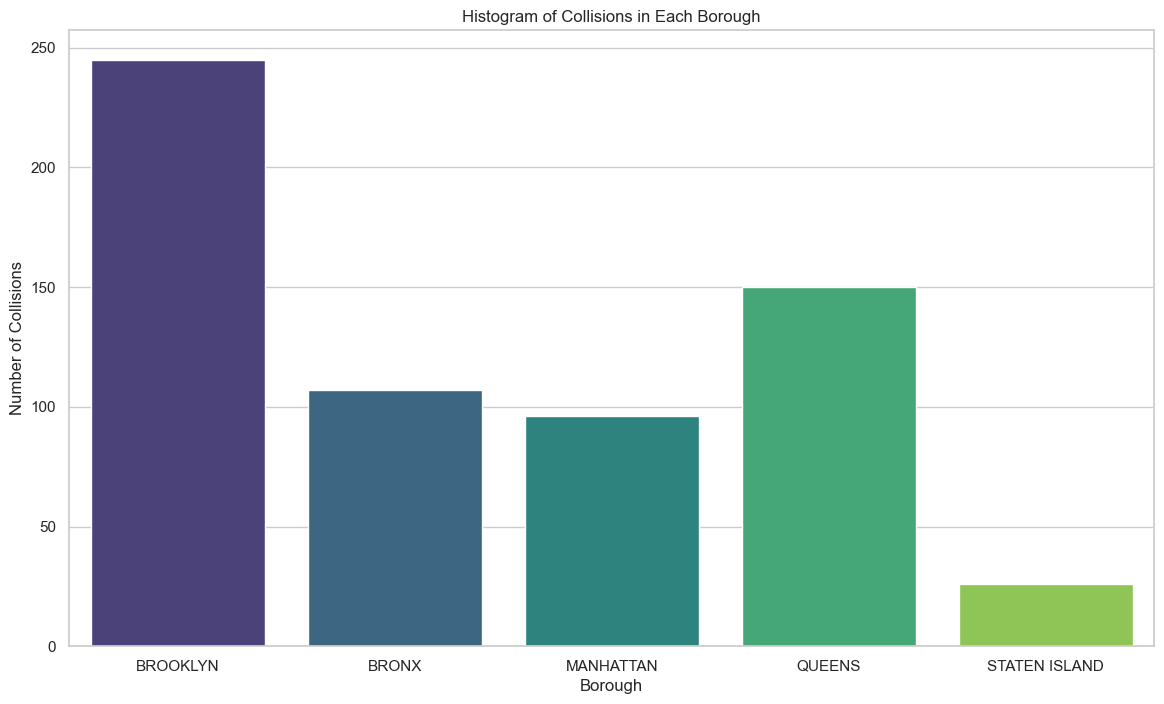

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'collision_df' is your DataFrame with the relevant columns
# You may need to adjust column names based on your actual DataFrame

# Histogram of collisions in each borough
plt.figure(figsize=(14, 8))
sns.countplot(x='borough', data=collision_df, palette='viridis')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.title('Histogram of Collisions in Each Borough')
plt.show()



In [181]:
# Check for null values in the 'collision_id' column
null_collision_id = vehicle_info_df['collision_id'].isnull().any()

if null_collision_id:
    print("There are null values in the 'collision_id' column.")
else:
    print("No null values found in the 'collision_id' column.")

No null values found in the 'collision_id' column.


In [174]:
collision_df

,collision_id,crash_date,crash_time,borough,latitude,longitude,hour,hour_am_pm
7,4486660,2021-12-14,NaT,BRONX,40.868160,-73.831480,8,08 AM
14,4486635,2021-12-14,NaT,QUEENS,40.666840,-73.789410,23,11 PM
16,4486991,2021-12-14,NaT,BROOKLYN,40.650680,-73.958810,20,08 PM
18,4487040,2021-12-11,NaT,BRONX,40.872620,-73.904686,19,07 PM
24,4487001,2021-12-13,NaT,STATEN ISLAND,40.631650,-74.087620,17,05 PM
...,...,...,...,...,...,...,...,...
988,4408300,2021-04-10,NaT,BRONX,40.834675,-73.930275,22,10 PM
989,4407768,2021-04-13,NaT,BROOKLYN,40.600883,-73.958694,8,08 AM
990,4407680,2021-04-15,NaT,BRONX,40.863647,-73.891800,23,11 PM
995,4407740,2021-04-14,NaT,BROOKLYN,40.676594,-73.890380,12,12 PM


In [175]:
people_affected_df

,collision_id,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed
7,4486660,2,0,0,0,0,0,2,0
14,4486635,2,0,0,0,0,0,2,0
16,4486991,4,0,0,0,0,0,4,0
18,4487040,1,0,0,0,0,0,1,0
24,4487001,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
988,4408300,4,0,0,0,0,0,4,0
989,4407768,1,0,0,0,0,0,0,0
990,4407680,1,0,0,0,0,0,1,0
995,4407740,2,0,0,0,0,0,2,0


C:\Users\krish\AppData\Local\Temp\ipykernel_7736\745818025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collision_df['crash_time'] = pd.to_datetime(collision_df['crash_time'], format='%H:%M:%S')
C:\Users\krish\AppData\Local\Temp\ipykernel_7736\745818025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collision_df['hour'] = collision_df['crash_time'].dt.hour
C:\Users\krish\AppData\Local\Temp\ipykernel_7736\745818025.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

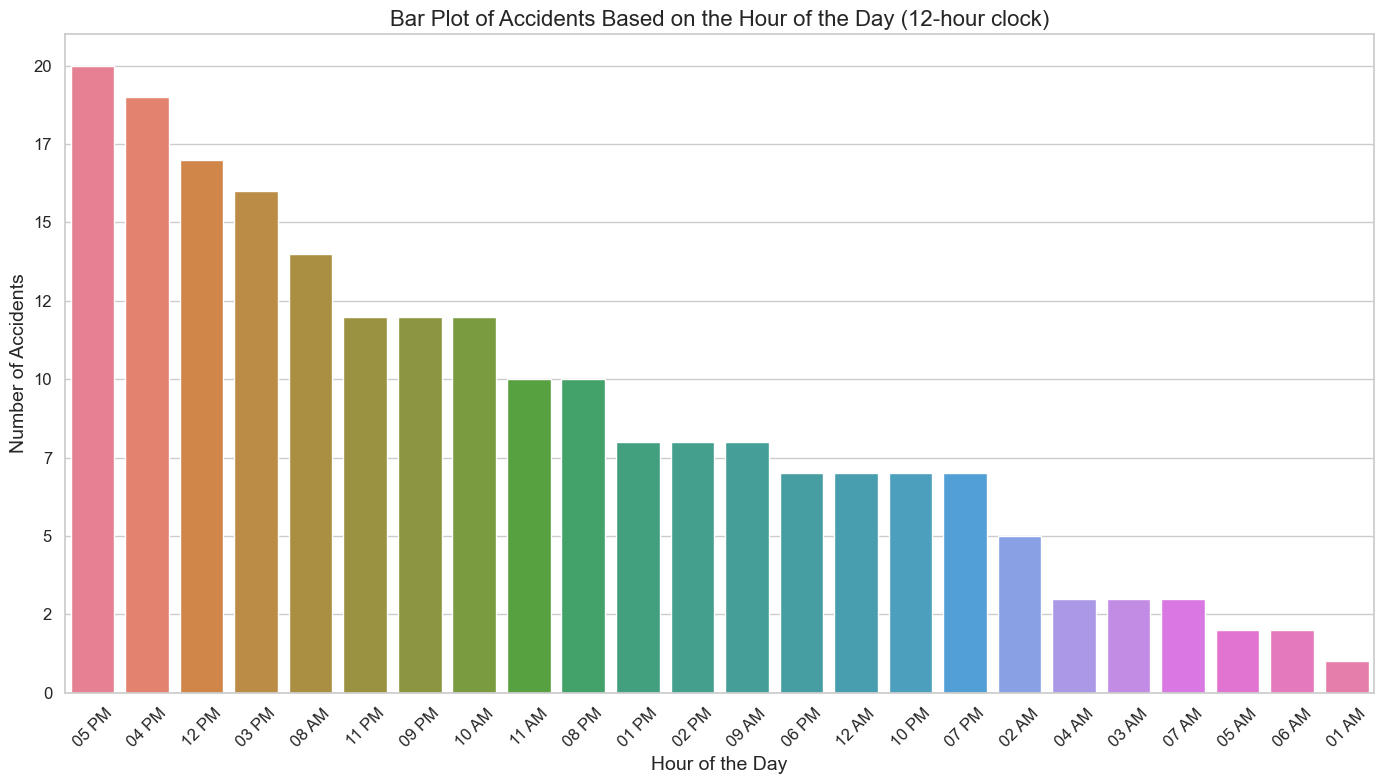

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'collision_df' is your DataFrame with the 'crash_time' column
collision_df['crash_time'] = pd.to_datetime(collision_df['crash_time'], format='%H:%M:%S')
collision_df['hour'] = collision_df['crash_time'].dt.hour
collision_df['hour_am_pm'] = collision_df['crash_time'].dt.strftime('%I %p')

# Set a high-end color palette
high_end_palette = sns.color_palette("husl", 24)

# Set the style
sns.set(style="whitegrid")

# Create a figure and axis with subplots
fig, ax = plt.subplots(figsize=(14, 8))

# Create a high-end bar plot with more customization
sns.countplot(x='hour_am_pm', data=collision_df, palette=high_end_palette, order=collision_df['hour_am_pm'].value_counts().index)

# Adding labels and title
ax.set_xlabel('Hour of the Day', fontsize=14)
ax.set_ylabel('Number of Accidents', fontsize=14)
ax.set_title('Bar Plot of Accidents Based on the Hour of the Day (12-hour clock)', fontsize=16)

# Customize the ticks
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Set y-axis labels to integers
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

# Show the plot
plt.tight_layout()
plt.show()

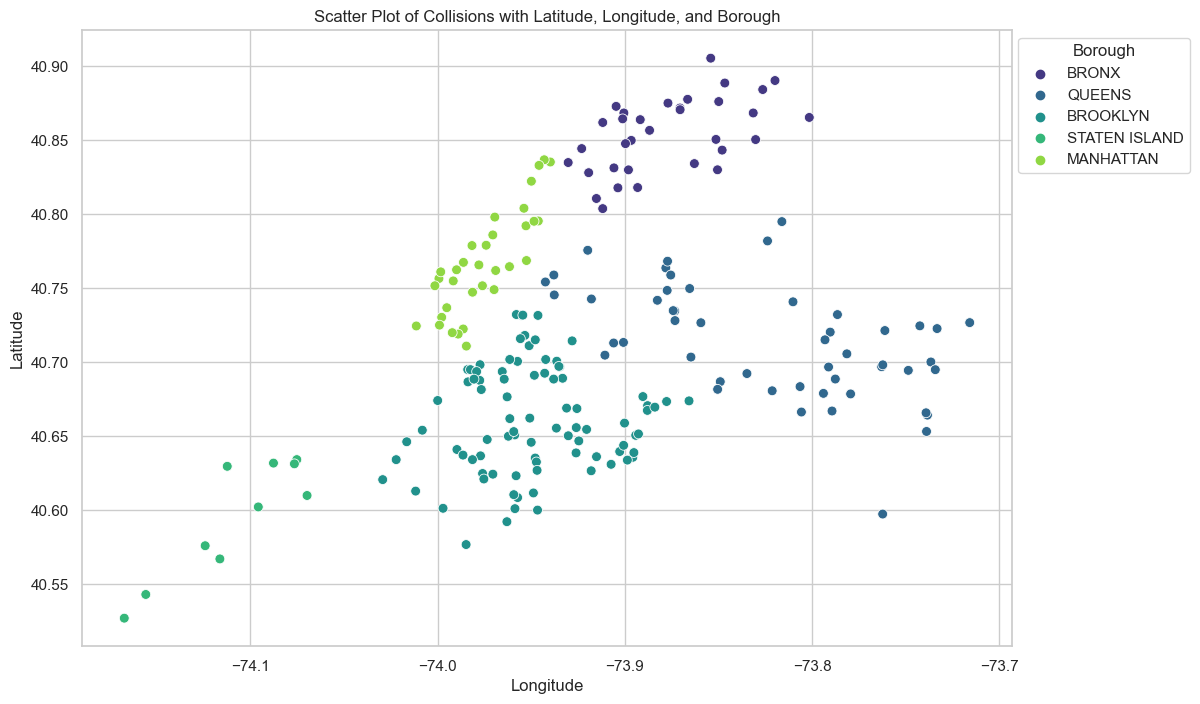

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'collision_df' is your DataFrame

plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='borough', data=collision_df, palette='viridis', s=50)
plt.title('Scatter Plot of Collisions with Latitude, Longitude, and Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Borough', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()